##**Step 4: Exploring the data**

Data exploration

In [227]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
#Load the CSV file into a DataFrame
mcd = pd.read_csv('mcdonalds.csv')

In [229]:
#Mention the columns present in the dataset
column_names=mcd.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [230]:
#Get the first few columns of the csv
print("First few rows of the dataset:")
mcd.head()

First few rows of the dataset:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [231]:
# Dimensions of the csv file
dimensions=mcd.shape
print(dimensions)

(1453, 15)


In [232]:
# Info of the csv
info=mcd.info
print(info)

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

In [233]:
print("\nData types of the columns:")
print(mcd.dtypes)


Data types of the columns:
yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [234]:
print("\nSummary statistics of the dataset:")
print(mcd.describe(include='all'))


Summary statistics of the dataset:
       yummy convenient spicy fattening greasy  fast cheap tasty expensive  \
count   1453       1453  1453      1453   1453  1453  1453  1453      1453   
unique     2          2     2         2      2     2     2     2         2   
top      Yes        Yes    No       Yes    Yes   Yes   Yes   Yes        No   
freq     803       1319  1317      1260    765  1308   870   936       933   
mean     NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
std      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
min      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
25%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
50%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
75%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
max      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   

       healthy disgusting  

Data Preprocessing


In [235]:
# Data Cleaning: Convert categorical values to numeric
# Encoding 'Yes' as 1 and 'No' as 0
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in binary_columns:
    mcd[col] = mcd[col].map({'Yes': 1, 'No': 0})

In [236]:
# Handle missing values
# Assuming numerical columns: Fill missing values with the mean of the column
numerical_columns = ['Age']
for col in numerical_columns:
    mcd[col].fillna(mcd[col].mean(), inplace=True)

In [237]:
# Encoding categorical columns
label_encoders = {}
categorical_columns = ['VisitFrequency', 'Gender']
for col in categorical_columns:
    le = LabelEncoder()
    mcd[col] = le.fit_transform(mcd[col].astype(str))
    label_encoders[col] = le

In [238]:
# Standardize numerical columns
scaler = StandardScaler()
mcd[numerical_columns] = scaler.fit_transform(mcd[numerical_columns])


In [239]:
# Print the preprocessed dataset
mcd.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,1.153258,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,0.449839,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,1.223600,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,1.715993,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,0.309156,3,1


In [240]:
# Convert 'Age' column to numeric
mcd['Age'] = pd.to_numeric(mcd['Age'], errors='coerce')

In [241]:
# Convert 'Like' column to numeric, removing non-numeric characters if necessary
mcd['Like'] = mcd['Like'].str.extract(r'([-+]?\d+)').astype(float)

In [242]:
# Encoding 'VisitFrequency' and 'Gender' as they are categorical
mcd['VisitFrequency'] = mcd['VisitFrequency'].astype('category').cat.codes
mcd['Gender'] = mcd['Gender'].astype('category').cat.codes


In [243]:
# Handle any remaining missing values if necessary
mcd = mcd.dropna()

Data visualization

In [244]:
# Descriptive Analysis
print("\nSummary statistics after cleaning the dataset:")
print(mcd.describe(include='all'))



Summary statistics after cleaning the dataset:
             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0

In [245]:
# Correlation Matrix
correlation_matrix = mcd.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   yummy  convenient     spicy  fattening    greasy      fast  \
yummy           1.000000    0.253807  0.008742  -0.087027 -0.151853  0.106836   
convenient      0.253807    1.000000  0.028928   0.036451 -0.106948  0.243062   
spicy           0.008742    0.028928  1.000000  -0.041322  0.053932  0.020276   
fattening      -0.087027    0.036451 -0.041322   1.000000  0.319283  0.045600   
greasy         -0.151853   -0.106948  0.053932   0.319283  1.000000 -0.058212   
fast            0.106836    0.243062  0.020276   0.045600 -0.058212  1.000000   
cheap           0.105036    0.151574  0.017203  -0.026640 -0.073264  0.252133   
tasty           0.687280    0.289755  0.061154  -0.087561 -0.163536  0.145836   
expensive      -0.061727   -0.163961  0.045979   0.089134  0.147283 -0.201694   
healthy         0.247183    0.099230  0.106252  -0.338401 -0.211186  0.033596   
disgusting     -0.419852   -0.340797  0.032834   0.146054  0.321879 -0.137993   
Like   

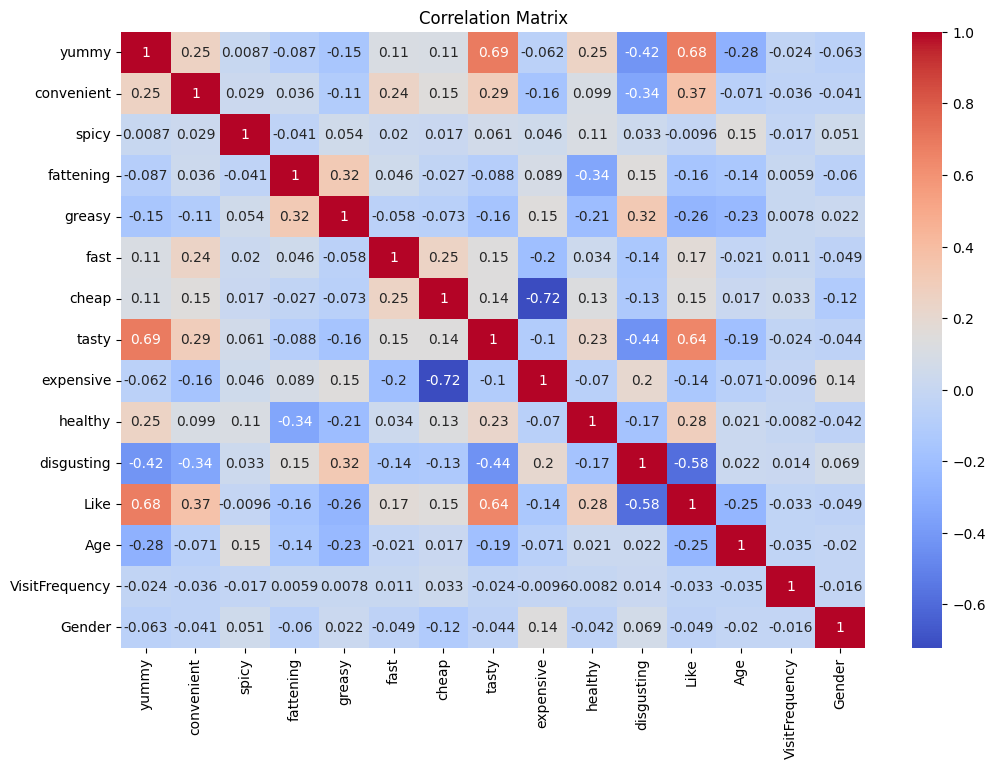

In [246]:
# Plotting the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [247]:
#Standardize the data for PCA
features = binary_columns + ['Like', 'Age', 'VisitFrequency', 'Gender']
x = mcd[features].values
x = StandardScaler().fit_transform(x)

In [248]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [249]:
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.23067196 0.11890002]


In [250]:
# Adding the principal components to the original dataframe
mcd_pca = pd.concat([mcd, pca_df], axis=1)


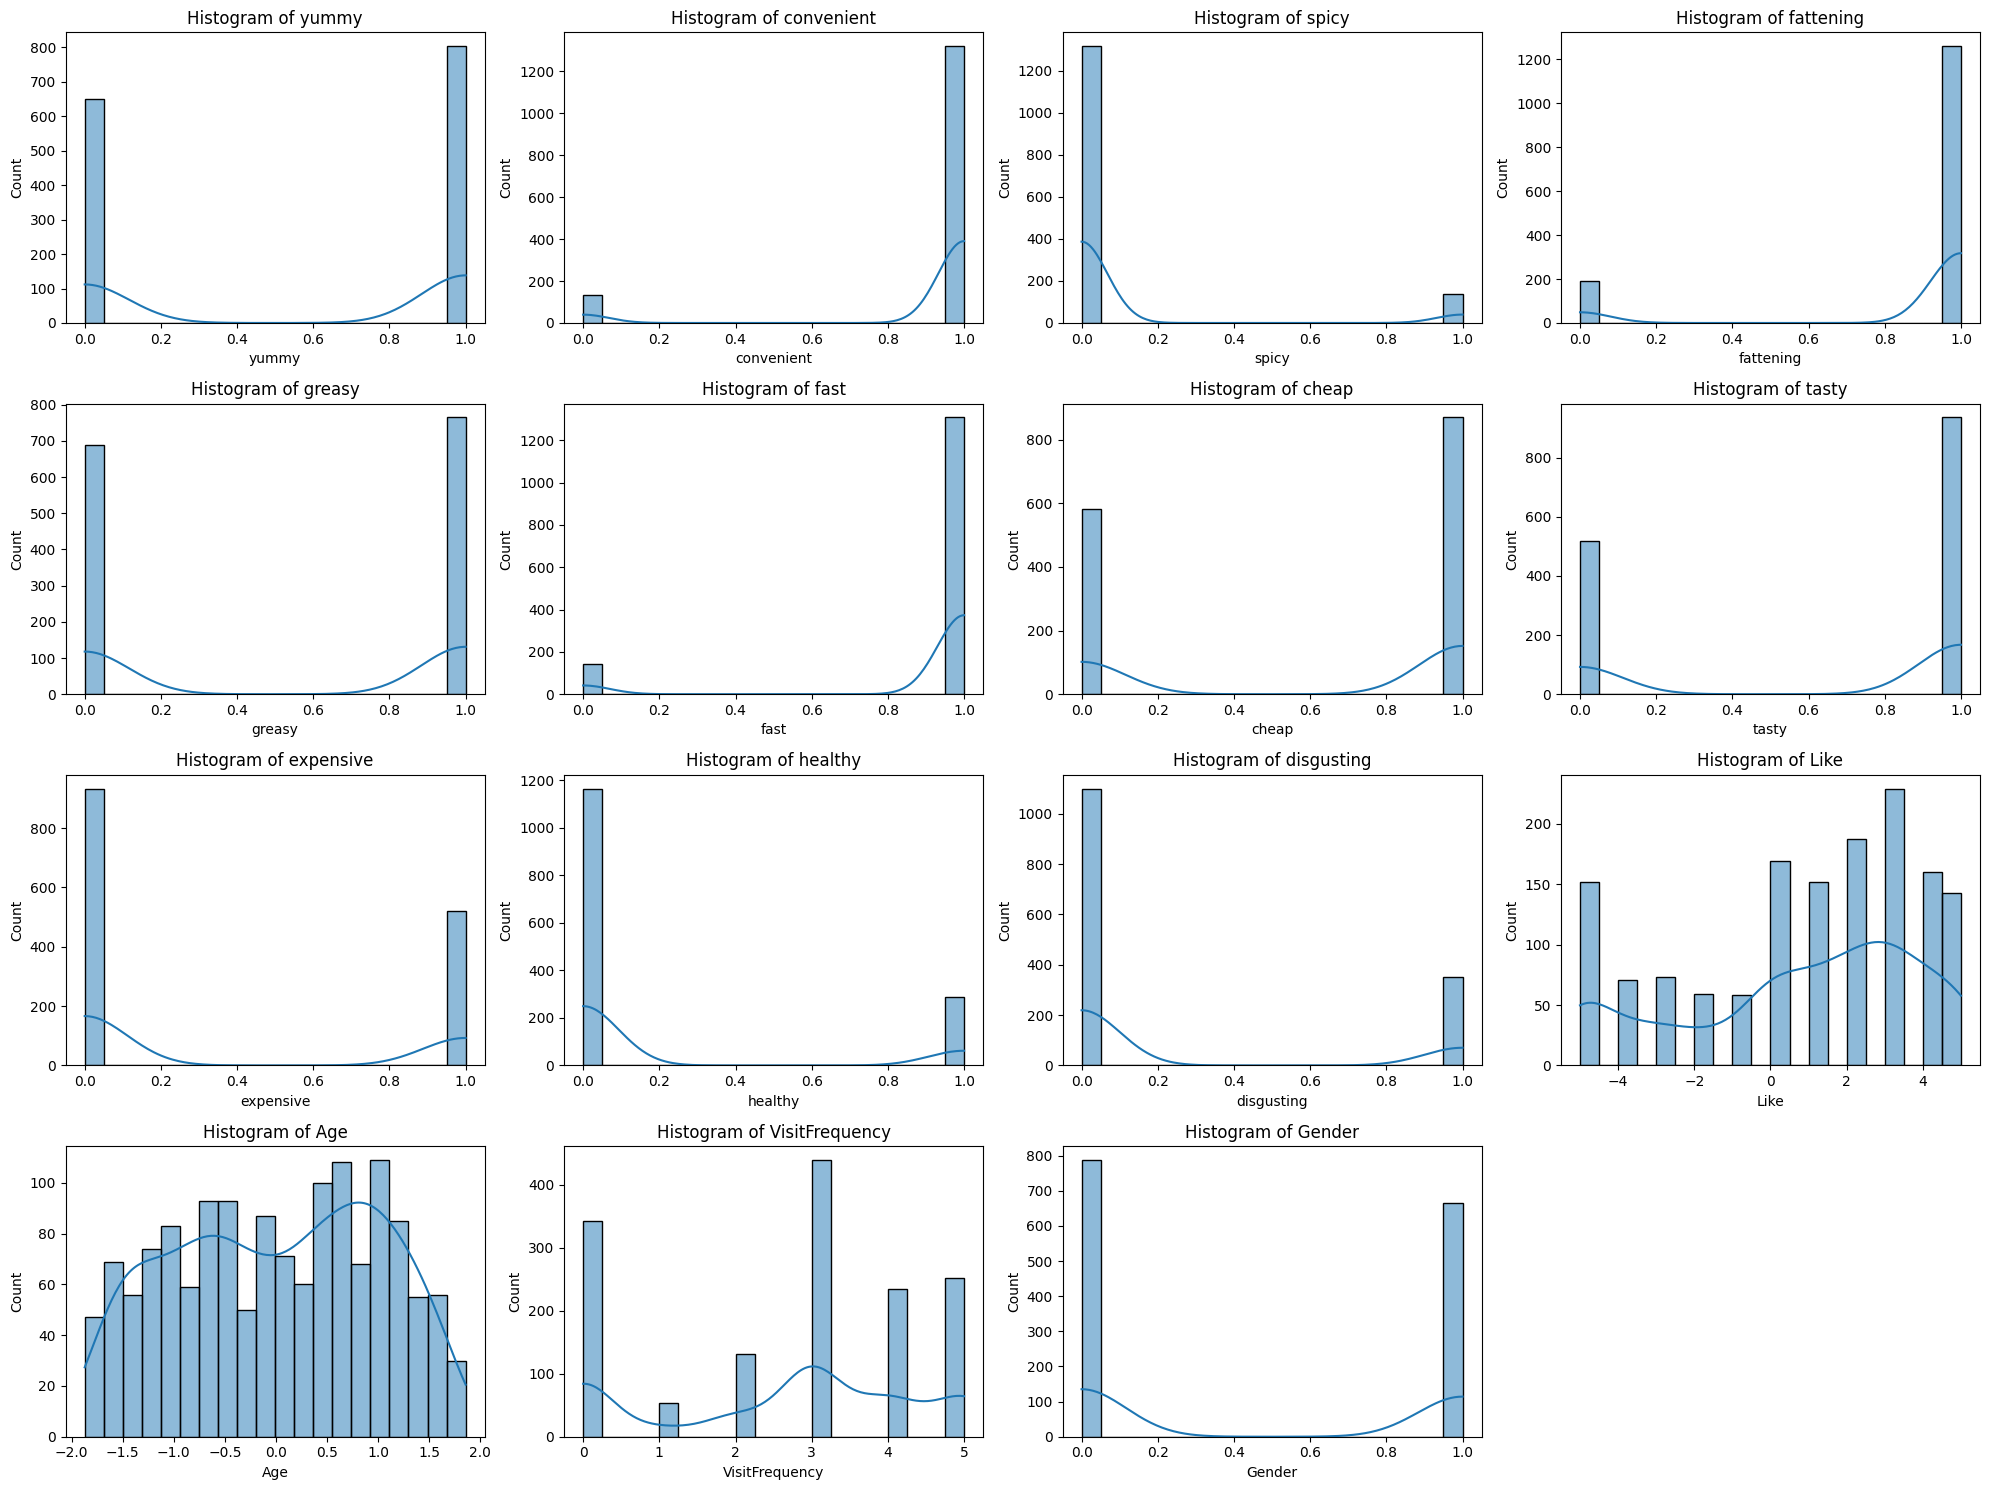

In [251]:
# Histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(binary_columns + ['Like', 'Age', 'VisitFrequency', 'Gender']):
    plt.subplot(4, 4, i+1)
    sns.histplot(mcd[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

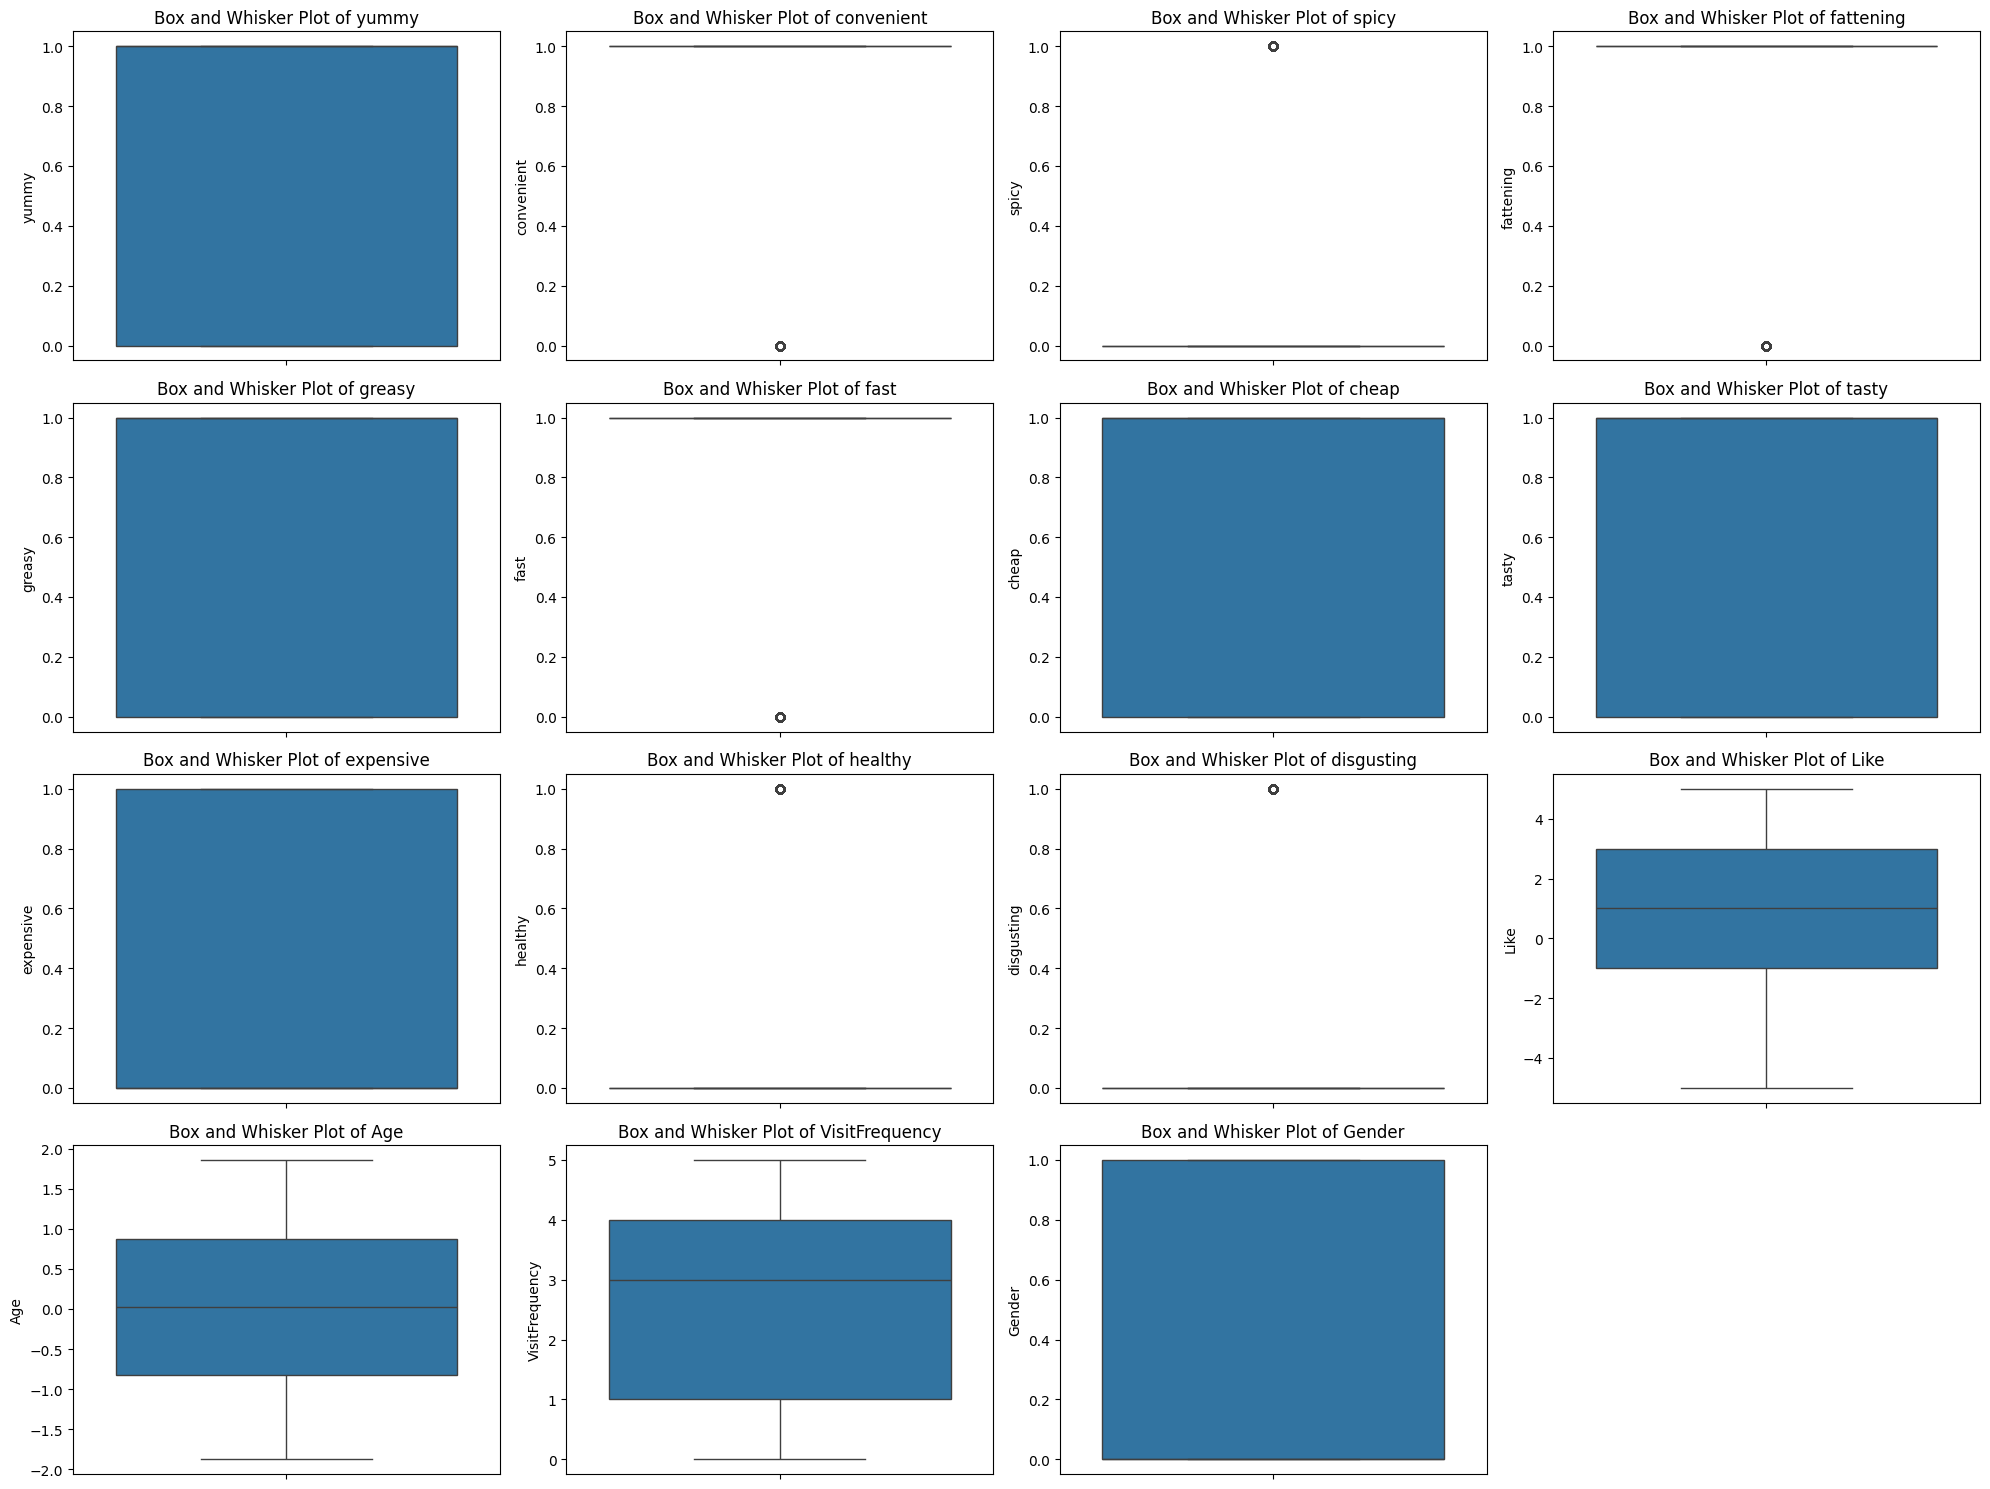

In [252]:
# Box and Whisker Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(binary_columns + ['Like', 'Age', 'VisitFrequency', 'Gender']):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=mcd[col])
    plt.title(f'Box and Whisker Plot of {col}')
plt.tight_layout()
plt.show()

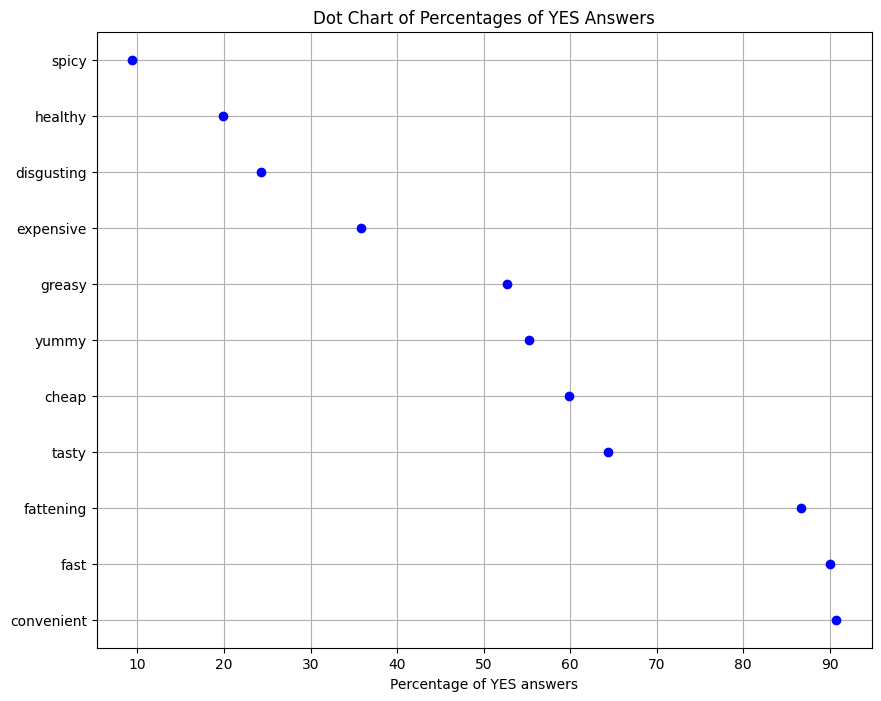

In [253]:
# Dot chart
# Calculate the percentage of "Yes" answers for each binary column
percent_yes = mcd[binary_columns].mean() * 100

# Sort percentages in descending order for better visualization
percent_yes = percent_yes.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.plot(percent_yes.values, percent_yes.index, 'o', color='blue')
plt.xlabel('Percentage of YES answers')
plt.title('Dot Chart of Percentages of YES Answers')
plt.grid(True)
plt.show()

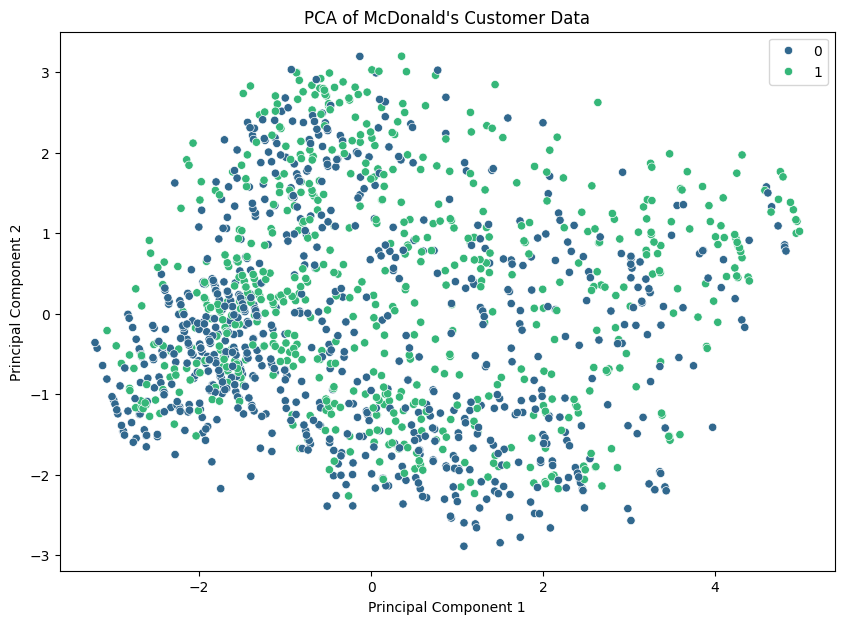

In [254]:
# Plotting the principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=mcd_pca, hue='Gender', palette='viridis')
plt.title('PCA of McDonald\'s Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()